In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import the necessary modules.
from google.colab import drive
import os

# Check if the directory is empty. If it isn't list the contents so the user can diagnose.
if os.path.exists('/content/drive') and os.listdir('/content/drive'):
  print("The /content/drive directory is not empty and contains the following files:")
  for item in os.listdir('/content/drive'):
    print(item)
else:
  # If the directory is empty or doesn't exist, proceed with mounting.
  drive.mount('/content/drive')

The /content/drive directory is not empty and contains the following files:
MyDrive
.file-revisions-by-id
.shortcut-targets-by-id
.Trash-0
.Encrypted


children

In [ ]:
!cp "/content/drive/MyDrive/Fingernails.zip" "/content/"

In [ ]:
!unzip "/content/drive/MyDrive/Fingernails.zip"

Archive:  /content/drive/MyDrive/Fingernails.zip
   creating: Fingernails/
   creating: Fingernails/Fingernails/
  inflating: Fingernails/Fingernails/Anemic-Fin-007 (10).png  
  inflating: Fingernails/Fingernails/Anemic-Fin-007 (11).png  
  inflating: Fingernails/Fingernails/Anemic-Fin-007 (12).png  
  inflating: Fingernails/Fingernails/Anemic-Fin-007 (2).png  
  inflating: Fingernails/Fingernails/Anemic-Fin-007 (3).png  
  inflating: Fingernails/Fingernails/Anemic-Fin-007 (4).png  
  inflating: Fingernails/Fingernails/Anemic-Fin-007 (5).png  
  inflating: Fingernails/Fingernails/Anemic-Fin-007 (6).png  
  inflating: Fingernails/Fingernails/Anemic-Fin-007 (7).png  
  inflating: Fingernails/Fingernails/Anemic-Fin-007 (8).png  
  inflating: Fingernails/Fingernails/Anemic-Fin-007 (9).png  
  inflating: Fingernails/Fingernails/Anemic-Fin-007.png  
  inflating: Fingernails/Fingernails/Anemic-Fin-008 (10).png  
  inflating: Fingernails/Fingernails/Anemic-Fin-008 (11).png  
  inflating: Finge

In [ ]:
import os
import cv2
import numpy as np

# Source and target directories
source_folder = '/content/Fingernails/Fingernails'
target_base_folder = '/content/selected_fingernails'
anemic_folder = os.path.join(target_base_folder, 'anemic')
non_anemic_folder = os.path.join(target_base_folder, 'non_anemic')

# Create target class folders
os.makedirs(anemic_folder, exist_ok=True)
os.makedirs(non_anemic_folder, exist_ok=True)

# Initialize image lists
anemic_count = 0
non_anemic_count = 0

# Sort and iterate through filenames
for filename in sorted(os.listdir(source_folder)):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        path = os.path.join(source_folder, filename)
        img = cv2.imread(path)

        if img is not None:
            if 'anemic' in filename.lower() and anemic_count < 375:
                save_path = os.path.join(anemic_folder, f"anemic_{anemic_count+1}.jpg")
                cv2.imwrite(save_path, img)
                anemic_count += 1
            elif 'anemic' not in filename.lower() and non_anemic_count < 375:
                save_path = os.path.join(non_anemic_folder, f"non_anemic_{non_anemic_count+1}.jpg")
                cv2.imwrite(save_path, img)
                non_anemic_count += 1

        # Break if both classes are full
        if anemic_count == 375 and non_anemic_count == 375:
            break

print(f"Saved 375 anemic images to: {anemic_folder}")
print(f"Saved 375 non-anemic images to: {non_anemic_folder}")



Saved 375 anemic images to: /content/selected_fingernails/anemic
Saved 375 non-anemic images to: /content/selected_fingernails/non_anemic


Image Distribution: Counter({'Anemic': 375, 'Non-Anemic': 375})


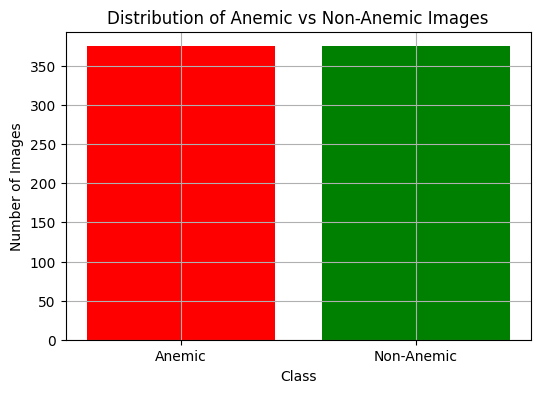

In [ ]:
import os
from collections import Counter

# Set class folders
base_folder = '/content/selected_fingernails'
anemic_folder = os.path.join(base_folder, 'anemic')
non_anemic_folder = os.path.join(base_folder, 'non_anemic')

# Count images
anemic_count = len([f for f in os.listdir(anemic_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
non_anemic_count = len([f for f in os.listdir(non_anemic_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

# Store counts in a dictionary
label_counts = Counter({'Anemic': anemic_count, 'Non-Anemic': non_anemic_count})
print("Image Distribution:", label_counts)
import matplotlib.pyplot as plt

# Bar Chart
plt.figure(figsize=(6, 4))
plt.bar(label_counts.keys(), label_counts.values(), color=['red', 'green'])
plt.title("Distribution of Anemic vs Non-Anemic Images")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.grid(True)
plt.show()



In [ ]:
from tensorflow.keras.layers import Dropout, BatchNormalization

# === Step 4: Build a stronger ResNet50 classifier ===
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze the last few layers for fine-tuning
for layer in base_model.layers[:-30]:
    layer.trainable = False
for layer in base_model.layers[-30:]:
    layer.trainable = True

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.4),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dense(2, activation='softmax')
])

# === Step 5: Compile and Train ===
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
print(" Training improved ResNet-based classifier...")
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=32)
# === Predict & Evaluate ===
pred_probs = model.predict(X_test)
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Distribution
unique_preds, pred_counts = np.unique(pred_classes, return_counts=True)
print("\n Predicted Class Distribution:")
print(f"Non-anemic (0): {pred_class_counts.get(0, 0)}")
print(f"Anemic (1): {pred_class_counts.get(1, 0)}")

# Report
print("\nClassification Report:")
print(classification_report(true_classes, pred_classes, target_names=["Non-Anemic", "Anemic"]))

# Matrix
print("\n Confusion Matrix:")
print(confusion_matrix(true_classes, pred_classes))


 Training improved ResNet-based classifier...
Epoch 1/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.4732 - loss: 1.0044 - val_accuracy: 0.4200 - val_loss: 0.8309
Epoch 2/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.6072 - loss: 0.7091 - val_accuracy: 0.4533 - val_loss: 0.8076
Epoch 3/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.7132 - loss: 0.6079 - val_accuracy: 0.4267 - val_loss: 0.9174
Epoch 4/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.7204 - loss: 0.5602 - val_accuracy: 0.4200 - val_loss: 1.1094
Epoch 5/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.7182 - loss: 0.5652 - val_accuracy: 0.4333 - val_loss: 1.1723
Epoch 6/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.7595 - loss: 0.5240 - val_accuracy: 0.4733 - val_loss: 1.2762
Epoch 7/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.7707 - loss: 0.4885 - val_accuracy: 0.4667 - val_loss: 1.4670
Epoch 8/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.7766 - l

Adults

In [ ]:
!cp "/content/drive/MyDrive/clustered_images.zip" "/content/"

In [ ]:
!unzip "/content/drive/MyDrive/clustered_images.zip" -d /content/clustered_images/

Archive:  /content/drive/MyDrive/clustered_images.zip
 extracting: /content/clustered_images/0_orig_296_197_anemic_nail_1.jpg  
 extracting: /content/clustered_images/0_orig_253_133_non_anemic_nail_2.jpg  
 extracting: /content/clustered_images/0_orig_664_87_anemic_nail_0.jpg  
 extracting: /content/clustered_images/1_orig_517_103_non_anemic_nail_0.jpg  
 extracting: /content/clustered_images/0_orig_131_191_non_anemic_nail_0.jpg  
 extracting: /content/clustered_images/0_orig_147_294_non_anemic_nail_1.jpg  
 extracting: /content/clustered_images/1_orig_473_280_anemic_nail_2.jpg  
 extracting: /content/clustered_images/0_orig_395_194_anemic_nail_2.jpg  
 extracting: /content/clustered_images/0_orig_629_49_non_anemic_nail_2.jpg  
 extracting: /content/clustered_images/1_orig_594_86_anemic_nail_0.jpg  
 extracting: /content/clustered_images/1_orig_393_315_anemic_nail_0.jpg  
 extracting: /content/clustered_images/1_orig_749_222_non_anemic_nail_2.jpg  
 extracting: /content/clustered_image

Loading and labeling images...

Label Distribution:
Non-Anemic (0): 455 images
Anemic (1): 295 images


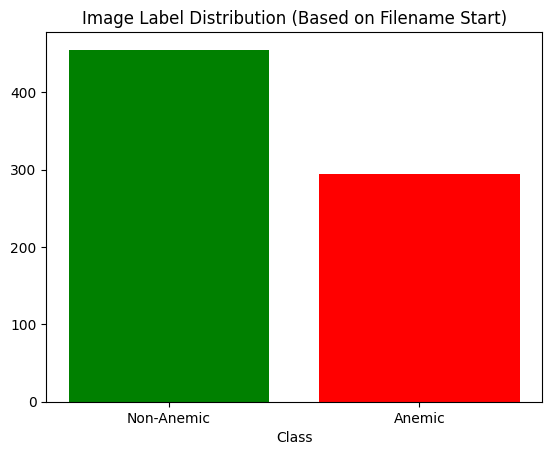

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from collections import Counter

# === Step 1: Load and label images ===
data_folder = '/content/clustered_images'
X_data = []
y_labels = []

# Assign label: starts with "1" → Anemic (1), starts with "0" → Non-Anemic (0)
def assign_label_from_filename_start(name):
    name = name.strip().lower()
    if name.startswith("1"):
        return 1  # Anemic
    elif name.startswith("0"):
        return 0  # Non-Anemic
    else:
        return None  # Unrecognized label

print("Loading and labeling images...")
for root, _, files in os.walk(data_folder):
    for filename in files:
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            label = assign_label_from_filename_start(filename)
            if label is None:
                continue
            file_path = os.path.join(root, filename)
            img = cv2.imread(file_path)
            if img is not None:
                img = cv2.resize(img, (224, 224))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = image.img_to_array(img)
                img = preprocess_input(np.expand_dims(img, axis=0))
                X_data.append(img)
                y_labels.append(label)

# Convert to numpy arrays
X = np.vstack(X_data)
y = np.array(y_labels)

# === Step 2: Count and visualize distribution ===
unique, counts = np.unique(y, return_counts=True)
label_map = {0: "Non-Anemic", 1: "Anemic"}

# Print counts
print("\nLabel Distribution:")
for u, c in zip(unique, counts):
    print(f"{label_map[u]} ({u}): {c} images")

# Plot bar chart
plt.bar([label_map[u] for u in unique], counts, color=['green', 'red'])
plt.title("Image Label Distribution (Based on Filename Start)")
plt.xlabel("Class")
plt.show()


In [ ]:
!cp "/content/drive/MyDrive/extracted_nailss.zip" "/content/"

In [ ]:
!unzip "/content/drive/MyDrive/extracted_nailss.zip" -d /content/extracted_nailss/

Archive:  /content/drive/MyDrive/extracted_nailss.zip
  inflating: /content/extracted_nailss/312_non_anemic_nail_0.jpg  
  inflating: /content/extracted_nailss/61_non_anemic_nail_2.jpg  
  inflating: /content/extracted_nailss/329_non_anemic_nail_1.jpg  
  inflating: /content/extracted_nailss/6_non_anemic_nail_0.jpg  
  inflating: /content/extracted_nailss/52_non_anemic_nail_0.jpg  
  inflating: /content/extracted_nailss/110_non_anemic_nail_2.jpg  
  inflating: /content/extracted_nailss/100_non_anemic_nail_2.jpg  
  inflating: /content/extracted_nailss/109_non_anemic_nail_1.jpg  
  inflating: /content/extracted_nailss/139_non_anemic_nail_2.jpg  
  inflating: /content/extracted_nailss/230_non_anemic_nail_1.jpg  
  inflating: /content/extracted_nailss/261_anemic_nail_1.jpg  
  inflating: /content/extracted_nailss/331_non_anemic_nail_0.jpg  
  inflating: /content/extracted_nailss/88_non_anemic_nail_2.jpg  
  inflating: /content/extracted_nailss/136_non_anemic_nail_2.jpg  
  inflating: /con

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# === Load pseudo-labeled images ===
data_folder = '/content/clustered_images'
X_data = []
y_labels = []

def assign_label_by_filename_start(name):
    if name.startswith("1"):
        return 1  # Anemic
    elif name.startswith("0"):
        return 0  # Non-Anemic
    else:
        return None  # Ignore

print("🔍 Loading pseudo-labeled training data...")
for root, _, files in os.walk(data_folder):
    for fname in files:
        if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
            label = assign_label_by_filename_start(fname)
            if label is None:
                continue
            path = os.path.join(root, fname)
            img = cv2.imread(path)
            if img is not None:
                img = cv2.resize(img, (224, 224))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = image.img_to_array(img)
                img = preprocess_input(np.expand_dims(img, axis=0))
                X_data.append(img)
                y_labels.append(label)

# === Convert to NumPy ===
X = np.vstack(X_data)
y = to_categorical(np.array(y_labels), num_classes=2)




# === Train/test split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Build ResNet50 model ===
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(2, activation='softmax')  # 2 classes
])

# Freeze base ResNet layers
for layer in base_model.layers:
    layer.trainable = False

# Compile and train
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
print("Training model on pseudo-labeled data...")
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# === Evaluate ===
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Non-Anemic', 'Anemic']))
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))


🔍 Loading pseudo-labeled training data...
Training model on pseudo-labeled data...
Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.5260 - loss: 0.7520 - val_accuracy: 0.6667 - val_loss: 0.6407
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.5617 - loss: 0.6895 - val_accuracy: 0.6600 - val_loss: 0.6264
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.6186 - loss: 0.6516 - val_accuracy: 0.5800 - val_loss: 0.6740
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.6924 - loss: 0.6210 - val_accuracy: 0.6467 - val_loss: 0.6427
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7380 - loss: 0.5948 - val_accuracy: 0.6600 - val_loss: 0.6273
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.6999 - loss: 0.5672 - val_accuracy: 0.6400 - val_loss: 0.6363
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.6965 - loss: 0.5771 - val_accuracy: 0.6400 - val_loss: 0.6376
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━

combind

In [ ]:

!cp "/content/drive/MyDrive/total_datasets.zip" "/content/"

In [ ]:

!mkdir -p /content/drive/MyDrive/total_datasets.zip

!unzip -q "/content/drive/MyDrive/total_datasets.zip" -d /content/total_datasets

mkdir: cannot create directory ‘/content/drive/MyDrive/total_datasets.zip’: File exists
replace /content/total_datasets/0_orig_296_197_anemic_nail_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [60]:
import os
import numpy as np
import cv2
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# === Step 1: Load and preprocess images, extract labels from filenames ===
def load_images_with_labels(folder, target_size=(224, 224)):
    images, labels = [], []
    for fname in sorted(os.listdir(folder)):
        if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
            try:
                label = int(fname[0])  # assumes filename like '0_img.jpg' or '1_xyz.png'
                path = os.path.join(folder, fname)
                img = cv2.imread(path)
                if img is not None:
                    img = cv2.resize(img, target_size)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img = image.img_to_array(img)
                    img = preprocess_input(np.expand_dims(img, axis=0))
                    images.append(img)
                    labels.append(label)
            except Exception as e:
                print(f"Skipping {fname}: {e}")
    return np.vstack(images), np.array(labels)

# === Step 2: Load Data ===
folder_path = '/content/total_datasets'
X, y = load_images_with_labels(folder_path)
y_onehot = to_categorical(y, num_classes=2)

# === Step 3: Split into train and test ===
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# === Step 4: Build ResNet50 Model ===
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Fine-tune last 30 layers
for layer in base_model.layers[:-30]:
    layer.trainable = False
for layer in base_model.layers[-30:]:
    layer.trainable = True

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='swish'),
    Dense(2, activation='softmax')  # Output: Non-Anemic (0), Anemic (1)
])

# === Step 5: Compile & Train ===
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
print("Training ResNet50 on /content/total_datasets ...")
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# === Step 6: Evaluate ===
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Non-Anemic', 'Anemic']))

print("\n🧩 Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))


Training ResNet50 on /content/total_datasets ...
Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.5281 - loss: 0.7531 - val_accuracy: 0.5867 - val_loss: 0.6957
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9622 - loss: 0.2442 - val_accuracy: 0.6400 - val_loss: 0.7294
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 1.0000 - loss: 0.0703 - val_accuracy: 0.6133 - val_loss: 0.7595
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 1.0000 - loss: 0.0160 - val_accuracy: 0.6133 - val_loss: 0.8579
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 0.6000 - val_loss: 0.9230
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 0.5800 - val_loss: 0.9516
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.5733 - val_loss: 0.9954
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 1.0000 